[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/pixeltable/pixeltable/blob/master/docs/release/fundamentals/tables-and-data-operations.ipynb)&nbsp;&nbsp;
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pixeltable/pixeltable/blob/master/docs/release/fundamentals/tables-and-data-operations.ipynb)&nbsp;&nbsp;
<a href="https://raw.githubusercontent.com/aaron-siegel/pixeltable/fundamentals-tutorial/docs/release/fundamentals/tables-and-data-operations.ipynb" download><img src="https://img.shields.io/badge/%E2%AC%87-Download%20Notebook-blue" alt="Download Notebook"></a>

# Pixeltable Fundamentals

## Section 1: Tables and Data Operations

Welcome to Section 1 of the [Pixeltable Fundamentals](...) tutorial, __Tables and Data Operations__. In this section, we'll learn how to:

- Create and manage tables: Understand Pixeltable's table structure, create and modify tables, and work with table schemas
- Manipulate data: Insert, update, and delete data within tables, and retrieve data from tables into Python variables
- Filter and select data: Use `where()`, `select()`, and `order_by()` to query for specific rows and columns
- Import data from CSV files and other file types

First, let's ensure the Pixeltable library is installed in your environment.

In [ ]:
%pip install -q pixeltable

### Tables

All data in Pixeltable is stored in tables. At a high level, a Pixeltable table behaves similarly to an ordinary SQL database table, but with many additional capabilities to support complex AI workflows. We'll introduce those advanced capabilities gradually throughout this tutorial; in this section, the focus is on basic table and data operations.

Tables in Pixeltable are grouped into __directories__, which are simply user-defined namespaces. The following command creates a new directory, `fundamentals`, which we'll use to store the tables in our tutorial.

In [1]:
import pixeltable as pxt

# First we delete the `fundamentals` directory and all its contents (if
# it exists), in order to ensure a clean environment for the tutorial.
pxt.drop_dir('fundamentals', force=True)

# Now we create the directory.
pxt.create_dir('fundamentals')

Connected to Pixeltable database at: postgresql://postgres:@/pixeltable?host=/Users/asiegel/.pixeltable/pgdata
Created directory `fundamentals`.


Now let's create our first table. To create a table, we must give it a name and a __schema__ that describes the table structure. Note that prefacing the name with `fundamentals` causes it to be placed in our newly-created directory.

In [2]:
films_t = pxt.create_table('fundamentals.films', {
    'film_name': pxt.StringType(),
    'year': pxt.IntType(),
    'revenue': pxt.FloatType()
})

Created table `films`.


To insert data into a table, we use the `insert()` method, passing it a list of Python dicts.

In [3]:
films_t.insert([
    {'film_name': 'Jurassic Park', 'year': 1993, 'revenue': 1037.5},
    {'film_name': 'Titanic', 'year': 1997, 'revenue': 2257.8},
    {'film_name': 'Avengers: Endgame', 'year': 2019, 'revenue': 2797.5}
])

Inserting rows into `films`: 3 rows [00:00, 517.69 rows/s]
Inserted 3 rows with 0 errors.


UpdateStatus(num_rows=3, num_computed_values=3, num_excs=0, updated_cols=[], cols_with_excs=[])

If you're inserting just a single row, you can use an alternate syntax that is sometimes more convenient.

In [4]:
films_t.insert(film_name='Inside Out 2', year=2024, revenue=1462.7)

Inserting rows into `films`: 1 rows [00:00, 401.41 rows/s]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=1, num_excs=0, updated_cols=[], cols_with_excs=[])

We can peek at the data in our table with the `collect()` method, which retrieves all the rows in the table.

In [5]:
films_t.collect()

film_name,year,revenue
Jurassic Park,1993,1037.5
Titanic,1997,2257.8
Avengers: Endgame,2019,2797.5
Inside Out 2,2024,1462.7


Pixeltable also provides `update()` and `delete()` methods for modifying and removing data from a table; we'll see examples of them shortly.

### Filtering and Selecting Data

Often you want to select only certain rows and/or certain columns in a table. You can do this with the `where()` and `select()` methods.

In [6]:
films_t.where(films_t.revenue >= 2000.0).collect()

film_name,year,revenue
Titanic,1997,2257.8
Avengers: Endgame,2019,2797.5


In [7]:
films_t.select(films_t.film_name, films_t.year).collect()

film_name,year
Jurassic Park,1993
Titanic,1997
Avengers: Endgame,2019
Inside Out 2,2024


Note the expressions that appear inside the calls to `where()` and `select()`, such as `films_t.year`. These are __column references__ that point to specific columns within a table. In place of `films_t.year`, you can also use dictionary syntax and type `films_t['year']`, which means exactly the same thing but is sometimes more convenient.

In [8]:
films_t.select(films_t['film_name'], films_t['year']).collect()

film_name,year
Jurassic Park,1993
Titanic,1997
Avengers: Endgame,2019
Inside Out 2,2024


In addition to selecting columns directly, you can use column references inside various kinds of expressions. For example, our `revenue` numbers are given in millions of dollars. Let's say we wanted to select revenue in thousands of dollars instead; we could do that as follows:

In [9]:
films_t.select(films_t.film_name, films_t.revenue * 1000).collect()

film_name,col_1
Jurassic Park,1037500.
Titanic,2257800.
Avengers: Endgame,2797500.
Inside Out 2,1462700.


Note that since we selected an abstract expression rather than a specific column, Pixeltable gave it the generic name `col_1`. You can assign it a more informative name with Python keyword syntax:

In [10]:
films_t.select(films_t.film_name, revenue_thousands=films_t.revenue * 1000).collect()

film_name,revenue_thousands
Jurassic Park,1037500.
Titanic,2257800.
Avengers: Endgame,2797500.
Inside Out 2,1462700.


### Tables are Persistent

This is a good time to mention a few key differences between Pixeltable tables and other familiar datastructures, such as Python dicts or Pandas dataframes.

First, **Pixeltable is persistent. Unlike in-memory Python libraries such as Pandas, Pixeltable is a database**. When you reset a notebook kernel or start a new Python session, you'll have access to all the data you've stored previously in Pixeltable. Let's demonstrate this by using the IPython `%reset -f` command to clear out all our notebook variables, so that `films_t` is no longer defined.

In [11]:
%reset -f
films_t.collect()  # Throws an exception now

NameError: name 'films_t' is not defined

The `films_t` variable (along with all other variables in our Python session) has been cleared out - but that's ok, because it wasn't the source of record for our data. The `films_t` variable is just a reference to the underlying database table. We can recover it with the `get_table` command, referencing the `films` table by name.

In [12]:
import pixeltable as pxt

films_t = pxt.get_table('fundamentals.films')
films_t.collect()

film_name,year,revenue
Jurassic Park,1993,1037.5
Titanic,1997,2257.8
Avengers: Endgame,2019,2797.5
Inside Out 2,2024,1462.7


You can always get a list of all existing tables with the Pixeltable `list_tables` command.

In [13]:
pxt.list_tables()

['fundamentals.films']

<div class="alert alert-block alert-info">
Note that if you're running Pixeltable on colab or kaggle, the database will persist only for as long as your colab/kaggle session remains active. If you're running it locally or on your own server, then your database will persist indefinitely (until you actively delete it).
</div>

### Tables are Typed

The second major difference is that **Pixeltable is strongly typed**. Because Pixeltable is a database, every column has a data type: that's why we specified `StringType`, `IntType`, and `FloatType` for the three columns when we created the table. These __type specifiers__ are _mandatory_ when creating tables, and they become part of the table schema. You can always see the table schema with the `describe()` method.

In [14]:
films_t.describe()

Column Name,Type,Computed With
film_name,string,
year,int,
revenue,float,


In a notebook, you can also just type `films_t` to see the schema; its output is identical to `films_t.describe()`.

In [15]:
films_t

Column Name,Type,Computed With
film_name,string,
year,int,
revenue,float,


<div class="alert alert-block alert-info">
In addition to <code>StringType</code>, <code>IntType</code>, and <code>FloatType</code>, Pixeltable provides several additional data types:
<ul><li><code>BoolType</code>, whose values are <code>True</code> or <code>False</code>;</li>
    <li><code>ArrayType</code> for numerical arrays;</li>
    <li><code>JsonType</code>, for lists or dicts that correspond to valid JSON structures; and</li>
    <li>The <b>media types</b> <code>ImageType</code>, <code>VideoType</code>, <code>AudioType</code>, and <code>DocumentType</code>.</li>
</ul>
We'll see examples of each of these types later in the tutorial.
</div>

Besides the column names and types, there's a third element to the schema, `Computed With`. We'll explain what this means in the next section of the tutorial, [Computed Columns](...).

All of the methods we've discussed so far, such as `insert()` and `get_table()`, are documented in the [Pixeltable API](https://pixeltable.github.io/pixeltable/) Documentation. The following pages are particularly relevant to this section of the tutorial:
- [pixeltable](https://pixeltable.github.io/pixeltable/api/pixeltable/) package reference
- [pxt.Table](https://pixeltable.github.io/pixeltable/api/table/) class reference
- [API Cheat Sheet](https://pixeltable.github.io/pixeltable/api-cheat-sheet/)

### A Real-World Example: Earthquake Data

Now let's dive a little deeper into Pixeltable's data operations. To showcase all the features, it'll be helpful to have a real-world dataset, rather than our toy dataset with four movies. The dataset we'll be using consists of Earthquake data drawn from the US Geological Survey: all recorded Earthquakes that occurred within 100 km of Seattle, Washington, between January 1, 2023 and June 30, 2024.

The dataset is in CSV format, and we can load it into Pixeltable with the handy `import_csv()` function, which creates a new Pixeltable table from the contents of a CSV file.

In [16]:
eq_t = pxt.io.import_csv(
    'fundamentals.earthquakes',  # Name for the new table
    'https://raw.githubusercontent.com/aaron-siegel/pixeltable/fundamentals-tutorial/docs/source/data/earthquakes.csv',
    primary_key='id',  # Column 'id' is the primary key
    parse_dates=[3]  # Interpret column 3 as a timestamp
)

Created table `earthquakes`.
Inserting rows into `earthquakes`: 1823 rows [00:00, 12212.84 rows/s]
Inserted 1823 rows with 0 errors.


<div class="alert alert-block alert-info">
In Pixeltable, you can always import external data by giving a URL instead of a local file path. This applies to CSV datasets, media files (such images and video), and other types of content. The URL will often be an <code>http://</code> URL, but it can also be an <code>s3://</code> URL referencing an S3 bucket.
</div>

<div class="alert alert-block alert-info">
In addition to <code>import_csv</code>, Pixeltable provides a variety of other importers for structured data, such as <code>import_pandas</code> (which creates a table from a Pandas dataframe) and <code>import_excel</code>. These importers are described in the <a href="https://pixeltable.github.io/pixeltable/api/io/">pixeltable.io package reference</a>.
</div>

Let's have a peek at our new dataset. The dataset contains 1823 rows, and we probably don't want to display them all at once. We can limit our query to fewer rows with the `limit()` method.

In [17]:
eq_t.limit(5).collect()

id,magnitude,location,timestamp,longitude,latitude
0,1.15,"10 km NW of Belfair, Washington",2023-01-01 08:10:37.050,-122.93,47.51
1,0.29,"23 km ENE of Ashford, Washington",2023-01-02 01:02:43.950,-121.76,46.85
2,0.2,"23 km ENE of Ashford, Washington",2023-01-02 12:05:01.420,-121.75,46.86
3,0.52,"15 km NNE of Ashford, Washington",2023-01-02 12:45:14.220,-121.95,46.89
4,1.56,"0 km WSW of Esperance, Washington",2023-01-02 13:19:27.200,-122.36,47.79


A different way of achieving something similar is to use the `head()` and `tail()` methods. Pixeltable keeps track of the insertion order of all its data, and `head()` and `tail()` will always return the _earliest inserted_ and _most recently inserted_ rows in a table, respectively.

In [18]:
eq_t.head(5)

id,magnitude,location,timestamp,longitude,latitude
0,1.15,"10 km NW of Belfair, Washington",2023-01-01 08:10:37.050,-122.93,47.51
1,0.29,"23 km ENE of Ashford, Washington",2023-01-02 01:02:43.950,-121.76,46.85
2,0.2,"23 km ENE of Ashford, Washington",2023-01-02 12:05:01.420,-121.75,46.86
3,0.52,"15 km NNE of Ashford, Washington",2023-01-02 12:45:14.220,-121.95,46.89
4,1.56,"0 km WSW of Esperance, Washington",2023-01-02 13:19:27.200,-122.36,47.79


In [19]:
eq_t.tail(5)

id,magnitude,location,timestamp,longitude,latitude
1818,1.7,"14 km W of Skokomish, Washington",2024-06-29 08:55:50.030,-123.35,47.32
1819,1.06,"7 km E of Lake McMurray, Washington",2024-06-29 12:15:19.130,-122.13,48.31
1820,0.48,"4 km E of Duvall, Washington",2024-06-30 09:15:43.020,-121.93,47.75
1821,0.46,"12 km NE of Ashford, Washington",2024-06-30 10:05:15.410,-121.93,46.84
1822,0.72,"6 km ENE of Oso, Washington",2024-06-30 11:12:41.900,-121.84,48.28


<div class="alert alert-block alert-info">
<code>head(n)</code> and <code>limit(n).collect()</code> appear similar in this example. But <code>head()</code> always returns the <i>earliest</i> rows in a table, whereas <code>limit()</code> makes no promises about the ordering of its results (unless you specify an <code>order_by()</code> clause - more on this below).
</div>

Let's also peek at the schema:

In [20]:
eq_t.describe()

Column Name,Type,Computed With
id,int,
magnitude,float,
location,string,
timestamp,timestamp,
longitude,float,
latitude,float,


Note that while specifying a schema is mandatory when _creating_ a table, it's not always required when _importing_ data. This is because Pixeltable uses the structure of the imported data to infer the column types, when feasible. You can always override the inferred column types with the `schema_overrides` parameter of `import_csv()`.

The following examples showcase some common data operations.

In [21]:
eq_t.count()  # Number of rows in the table

1823

In [22]:
# 5 highest-magnitude earthquakes

eq_t.order_by(eq_t.magnitude, asc=False).limit(5).collect()

id,magnitude,location,timestamp,longitude,latitude
1002,4.3,"Port Townsend, WA",2023-10-09 02:21:08.960,-122.73,48.04
1226,4.04,"6 km W of Quilcene, Washington",2023-12-24 15:14:04.220,-122.96,47.82
699,3.91,"9 km NNE of Snoqualmie, Washington",2023-08-08 10:17:23.910,-121.77,47.6
1281,3.48,"7 km SSW of River Road, Washington",2024-01-15 07:25:05.920,-123.17,48.
1355,3.42,"17 km WSW of Brinnon, Washington",2024-02-16 16:30:18.830,-123.09,47.59


In [23]:
# 5 highest-magnitude earthquakes in Q3 2023

eq_t.where((eq_t.timestamp >= '2023-06-01') & (eq_t.timestamp < '2023-10-01')) \
  .order_by(eq_t.magnitude, asc=False).limit(5).collect()

id,magnitude,location,timestamp,longitude,latitude
699,3.91,"9 km NNE of Snoqualmie, Washington",2023-08-08 10:17:23.910,-121.77,47.6
799,2.86,"5 km E of Ashford, Washington",2023-08-27 10:10:23.770,-121.96,46.77
710,2.84,"8 km ENE of Fall City, Washington",2023-08-08 11:51:12.750,-121.79,47.6
577,2.79,"0 km NE of Maple Valley, Washington",2023-07-04 15:52:54.430,-122.04,47.4
769,2.73,"16 km NE of Ashford, Washington",2023-08-22 23:44:12.250,-121.88,46.87


Note that Pixeltable uses Pandas-like operators for filtering data: the expression

```python
(eq_t.timestamp >= '2023-06-01') & (eq_t.timestamp < '2023-10-01')
```

means _both_ conditions must be true; similarly (say),

```python
(eq_t.timestamp < '2023-06-01') | (eq_t.timestamp >= '2024-01-01')
```

would mean _either_ condition must be true.

You can also use the special `isin` operator to select just those values that appear within a particular list:

In [24]:
# Earthquakes with specific ids

eq_t.where(eq_t.id.isin([123,456,789])).collect()

id,magnitude,location,timestamp,longitude,latitude
123,1.23,"7 km SW of Rainier, Washington",2023-02-17 00:28:25.460,-122.75,46.84
456,0.23,Washington,2023-05-23 08:49:02.450,-121.98,46.87
789,1.67,"Puget Sound region, Washington",2023-08-26 04:04:11.200,-122.57,47.6


In [25]:
# Min and max magnitudes

eq_t.select(min=pxt.functions.min(eq_t.magnitude), max=pxt.functions.max(eq_t.magnitude)).collect()

min,max
-0.83,4.3


### Extracting Data from Tables into Python/Pandas

Sometimes it's handy to pull out data from a table into a Python object. We've actually already done this; the call to `collect()` returns an in-memory result set, which we can then dereference in various ways. For example:

In [26]:
result = eq_t.limit(5).collect()
result[0]  # Get the first row of the results as a dict

{'id': 0,
 'magnitude': 1.15,
 'location': '10 km NW of Belfair, Washington',
 'timestamp': datetime.datetime(2023, 1, 1, 8, 10, 37, 50000),
 'longitude': -122.93,
 'latitude': 47.51}

In [27]:
result['timestamp']  # Get a list of the `timestamp` field of all the rows that were queried

[datetime.datetime(2023, 1, 1, 8, 10, 37, 50000),
 datetime.datetime(2023, 1, 2, 1, 2, 43, 950000),
 datetime.datetime(2023, 1, 2, 12, 5, 1, 420000),
 datetime.datetime(2023, 1, 2, 12, 45, 14, 220000),
 datetime.datetime(2023, 1, 2, 13, 19, 27, 200000)]

In [28]:
df = result.to_pandas()  # Convert the result set into a Pandas dataframe
df['magnitude'].describe()

count    5.000000
mean     0.744000
std      0.587988
min      0.200000
25%      0.290000
50%      0.520000
75%      1.150000
max      1.560000
Name: magnitude, dtype: float64

`collect()` without a preceding `limit()` returns the entire contents of a query or table. Be careful! For very large tables, this could result in out-of-memory errors. In this example, the 1823 rows in the table fit comfortably into a dataframe.

In [29]:
df = eq_t.collect().to_pandas()
df['magnitude'].describe()

count    1823.000000
mean        0.900378
std         0.625492
min        -0.830000
25%         0.420000
50%         0.850000
75%         1.310000
max         4.300000
Name: magnitude, dtype: float64

### Adding Columns

Like other database tables, Pixeltable tables aren't fixed entities: they're meant to evolve over time. Suppose we want to add a new column to hold user-specified comments about particular earthquake events. We can do this with the `add_column()` method:

In [30]:
eq_t.add_column(note=pxt.StringType(nullable=True))

Added 1823 column values with 0 errors.


UpdateStatus(num_rows=1823, num_computed_values=1823, num_excs=0, updated_cols=[], cols_with_excs=[])

Here, `note` is the column name, and `pxt.StringType` specifies the type of the new column. `nullable=True` means that it's an _optional_ field. That `nullable=True` is mandatory for newly-added columns, because none of the existing rows have a comment (yet) - so it'd be inconsistent with the existing data to make `note` a required field.

An alternate syntax is sometimes convenient for adding columns:

In [31]:
eq_t['contact_email'] = pxt.StringType(nullable=True)

Added 1823 column values with 0 errors.


Let's have a look at the revised schema.

In [32]:
eq_t.describe()

Column Name,Type,Computed With
id,int,
magnitude,float,
location,string,
timestamp,timestamp,
longitude,float,
latitude,float,
note,string,
contact_email,string,


### Updating and Deleting Data

Table rows can be modified and deleted with the SQL-like `update()` and `delete()` commands.

In [33]:
# Add a comment to records with IDs 123 and 127

eq_t.where(eq_t.id.isin([121,123])).update({'note': 'Still investigating.', 'contact_email': 'contact@pixeltable.com'})

Inserting rows into `earthquakes`: 2 rows [00:00, 742.42 rows/s]


UpdateStatus(num_rows=2, num_computed_values=0, num_excs=0, updated_cols=['earthquakes.note', 'earthquakes.contact_email'], cols_with_excs=[])

In [34]:
eq_t.where(eq_t.id >= 120).select(eq_t.id, eq_t.magnitude, eq_t.note, eq_t.contact_email).head(5)

id,magnitude,note,contact_email
120,1.17,None,None
121,1.87,Still investigating.,contact@pixeltable.com
122,0.34,None,None
123,1.23,Still investigating.,contact@pixeltable.com
124,0.13,None,None


Another useful method is `batch_update()`, which is used to update many rows at once, in situations where the contents of the update are different for each row. Here's a toy example that shows `batch_update()` in action.

In [35]:
# Update all rows with 500 <= id < 600 with `note` fields such as 'This is note 546'.

updates = [
    {
        'id': n,
        'note': f'This is note {n}.'
    }
    for n in range(500, 600)
]
eq_t.batch_update(updates)

UpdateStatus(num_rows=100, num_computed_values=0, num_excs=0, updated_cols=['earthquakes.note'], cols_with_excs=[])

In [36]:
eq_t.where(eq_t.id >= 500).select(eq_t.id, eq_t.magnitude, eq_t.note, eq_t.contact_email).head(5)

id,magnitude,note,contact_email
500,0.75,This is note 500.,None
501,0.23,This is note 501.,None
502,0.43,This is note 502.,None
503,0.31,This is note 503.,None
504,0.35,This is note 504.,None


To delete rows from a table, use the `delete()` method.

In [37]:
# Delete all rows in 2024

eq_t.where(eq_t.timestamp >= '2024-01-01').delete()

UpdateStatus(num_rows=587, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [38]:
eq_t.count()  # How many are left after deleting?

1236

Don't forget to specify a `where()` clause when using `delete()`! If you run `delete()` without a `where()` clause, the entire contents of the table will be deleted.

In [39]:
eq_t.delete()

UpdateStatus(num_rows=1236, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [40]:
eq_t.count()

0

### Table Versioning

Every table in Pixeltable is versioned: some or all of its modification history is preserved. If you make a mistake, you can always call `revert()` to undo the previous change to a table. Let's try it out: we'll use it to revert the successive `delete()` calls that we just executed.

In [41]:
eq_t.revert()

In [42]:
eq_t.count()

1236

In [43]:
eq_t.revert()

In [44]:
eq_t.count()

1823

<div class="alert alert-block alert-info">
Be aware: calling <code>revert()</code> cannot be undone!
</div>

### Multimodal Data

In addition to the structured data we've been exploring so far in this tutorial, Pixeltable has native support for __media types__: images, video, audio, and unstructured documents such as pdfs. Media support is one of Pixeltable's core capabilities, and we'll have much more to say about it the upcoming [Unstructured Data](...) section of this tutorial. For now, we'll just give one example to show how media data lives side-by-side with structured data in Pixeltable.

In [45]:
eq_t['map_image'] = pxt.ImageType(nullable=True)  # Add a new `ImageType` column
eq_t.describe()

Added 1823 column values with 0 errors.


Column Name,Type,Computed With
id,int,
magnitude,float,
location,string,
timestamp,timestamp,
longitude,float,
latitude,float,
note,string,
contact_email,string,
map_image,image,


In [46]:
# Update the row with id == 1002, adding an image to the `map_image` column

eq_t.where(eq_t.id == 1002).update(
    {'map_image': 'https://raw.githubusercontent.com/aaron-siegel/pixeltable/fundamentals-tutorial/docs/source/data/port-townsend-map.jpeg'}
)

Inserting rows into `earthquakes`: 1 rows [00:00, 408.20 rows/s]


UpdateStatus(num_rows=1, num_computed_values=0, num_excs=0, updated_cols=['earthquakes.map_image'], cols_with_excs=[])

Just like when using `import_csv`, you can refer to images with either a local file path or a URL. Pixeltable will embed image thumbnails in your notebook when you do a query:

id,magnitude,location,map_image
1000,-0.02,"17 km SSE of Carbonado, Washington",None
1001,0.82,"22 km ENE of Ashford, Washington",None
1002,4.3,"Port Townsend, WA",
1003,1.04,Washington,None
1004,0.79,"24 km ENE of Ashford, Washington",None

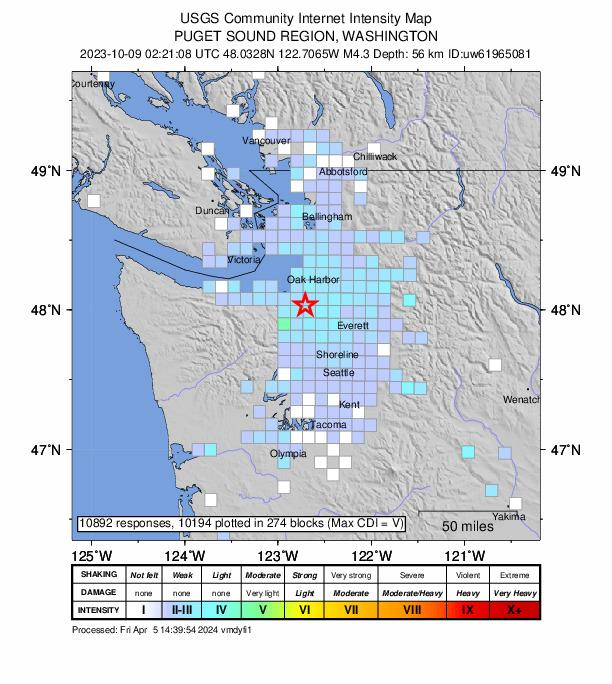

In [47]:
eq_t.where(eq_t.id >= 1000).select(eq_t.id, eq_t.magnitude, eq_t.location, eq_t.map_image).head(5)

### Directory Hierarchies

So far we've only seen an example of a single directory with a table inside it, but one can also put directories inside other directories, in whatever fashion makes the most sense for a given application.

In [48]:
pxt.create_dir('fundamentals.subdir')
pxt.create_dir('fundamentals.subdir.subsubdir')
pxt.create_table('fundamentals.subdir.subsubdir.my_table', {'my_col': pxt.StringType()})

Created directory `fundamentals.subdir`.
Created directory `fundamentals.subdir.subsubdir`.
Created table `my_table`.


Column Name,Type,Computed With
my_col,string,


### Deleting Columns, Tables, and Directories

`drop_column()`, `drop_table()`, and `drop_dir()` are used to delete columns, tables, and directories, respectively.

In [49]:
# Delete the `contact_email` column

eq_t.drop_column('contact_email')

In [50]:
eq_t.describe()

Column Name,Type,Computed With
id,int,
magnitude,float,
location,string,
timestamp,timestamp,
longitude,float,
latitude,float,
note,string,
map_image,image,


In [51]:
# Delete the entire table (cannot be reverted!)

pxt.drop_table('fundamentals.earthquakes')

In [52]:
# Delete the entire directory and all its contents, including any nested
# subdirectories (cannot be reverted!)

pxt.drop_dir('fundamentals', force=True)

That's the end of this section of the Fundamentals tutorial! Continue on to the next section:
- [Computed Columns](...)